In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('churn.csv')
df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_columns=list(df.dtypes[df.dtypes=='object'].index)
for i in categorical_columns:
    df[i] = df[i].str.lower().str.replace(' ','_')
df.totalcharges=pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges=df.totalcharges.fillna(0)
df.churn=(df.churn == 'yes').astype(int)

In [3]:
df_train_full,df_test=train_test_split(df,test_size=0.2,random_state=1)
df_train,df_val=train_test_split(df_train_full,test_size=0.25,random_state=1)

df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

y_train=df_train.churn.values
y_val=df_val.churn.values
y_test=df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

numerical=['tenure', 'monthlycharges', 'totalcharges']
categorias=['gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

dv=DictVectorizer(sparse=False)
train_dicts=df_train[numerical + categorias].to_dict(orient='records')
X_train= dv.fit_transform(train_dicts)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

dicts_val = df_val[categorias+numerical].to_dict(orient='records')
X_val=dv.fit_transform(dicts_val)

y_pred=model.predict_proba(X_val)[:,1]
((y_pred >= 0.52).astype(int)==y_val).astype(int).mean()

np.float64(0.8055358410220014)

In [4]:
scores=[]
for j in np.linspace(0,1,21):
    decision=(y_pred >= j)
    score= (y_val == decision).mean()
    scores.append(score)

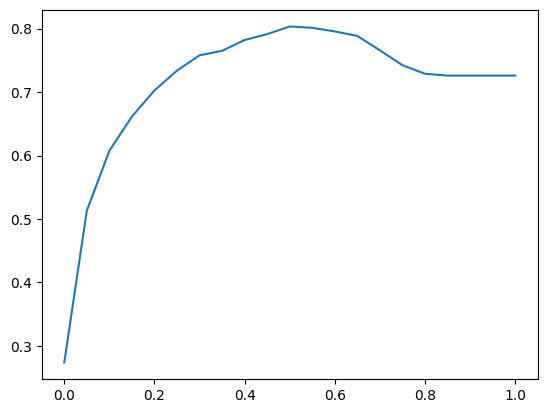

In [5]:
plt.plot(np.linspace(0,1,21), scores)

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
scores=[]
for j in np.linspace(0,1,21):
    score=accuracy_score(y_val, y_pred >= j)
    scores.append(score)

In [8]:
from collections import Counter

Nuestro modelo es 80% pero si considero descartar todos es decir j=1.0, tengo que el modelo le pega al 73%, es decir que nuestro modelo arregla un 7% de lo que es el "modelo estupido", esto muestra un desbalance entre los datos ya que casi 3:1 son falsos

In [9]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)
t=0.5
pred_positive = (y_pred >= t)
pred_negative = (y_pred < t)

In [10]:
tp=(actual_positive & pred_positive).sum()
tn=(actual_negative & pred_negative).sum()
fp=(pred_positive & actual_negative).sum()
fn=(pred_negative & actual_positive).sum()

In [11]:
confusion_matrix= np.array([
    [tn,fp],
    [fn,tp]
])
confusion_matrix

array([[920, 103],
       [174, 212]])

In [12]:
confusion_matrix_norm=confusion_matrix / confusion_matrix.sum()

In [13]:
confusion_matrix_norm

array([[0.65294535, 0.07310149],
       [0.12349184, 0.15046132]])

In [14]:
precision= tp/(tp+fp)

In [15]:
recall=tp/(tp+fn)

In [16]:
tpr=tp/(tp+fn)

In [17]:
fpr=fp/(tn+fp)

In [18]:
parametro= np.linspace(0,1,101)
scores=[]
for j in parametro:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    pred_positive = (y_pred >= j)
    pred_negative = (y_pred < j)
    tp=(actual_positive & pred_positive).sum()
    tn=(actual_negative & pred_negative).sum()
    fp=(pred_positive & actual_negative).sum()
    fn=(pred_negative & actual_positive).sum()
    scores.append((float(j),float(tp),float(fp),float(fn),float(tn)))

In [19]:
df_scor=pd.DataFrame(scores,columns=['par','tp','fp','fn','tn'])

In [20]:
df_scor

,par,tp,fp,fn,tn
0,0.00,386.0,1023.0,0.0,0.0
1,0.01,385.0,894.0,1.0,129.0
2,0.02,383.0,804.0,3.0,219.0
3,0.03,382.0,749.0,4.0,274.0
4,0.04,382.0,709.0,4.0,314.0
...,...,...,...,...,...
96,0.96,0.0,0.0,386.0,1023.0
97,0.97,0.0,0.0,386.0,1023.0
98,0.98,0.0,0.0,386.0,1023.0
99,0.99,0.0,0.0,386.0,1023.0


In [21]:
df_scor['tpr']=df_scor.tp/(df_scor.tp+df_scor.fn)
df_scor['fpr']=df_scor.fp/(df_scor.tn+df_scor.fp)
df_scor

,par,tp,fp,fn,tn,tpr,fpr
0,0.00,386.0,1023.0,0.0,0.0,1.000000,1.000000
1,0.01,385.0,894.0,1.0,129.0,0.997409,0.873900
2,0.02,383.0,804.0,3.0,219.0,0.992228,0.785924
3,0.03,382.0,749.0,4.0,274.0,0.989637,0.732160
4,0.04,382.0,709.0,4.0,314.0,0.989637,0.693060
...,...,...,...,...,...,...,...
96,0.96,0.0,0.0,386.0,1023.0,0.000000,0.000000
97,0.97,0.0,0.0,386.0,1023.0,0.000000,0.000000
98,0.98,0.0,0.0,386.0,1023.0,0.000000,0.000000
99,0.99,0.0,0.0,386.0,1023.0,0.000000,0.000000


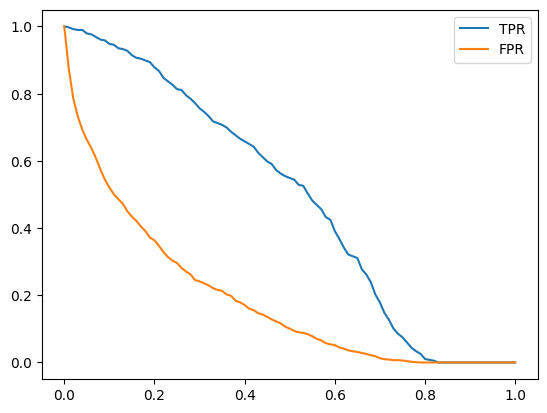

In [22]:
plt.plot(df_scor.par,df_scor.tpr, label='TPR')
plt.plot(df_scor.par,df_scor.fpr, label='FPR')
plt.legend()

Lo que buscamos es que TPR sea máximo y FPR mínimo así que hay que hallar los valores que convienen

In [23]:
np.random.seed(1)
y_rand=np.random.uniform(0,1,size=len(y_val))

In [24]:
def fpr_tpr_df(y_val,y_pred):
    parametro= np.linspace(0,1,101)
    scores=[]
    for j in parametro:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        pred_positive = (y_pred >= j)
        pred_negative = (y_pred < j)
        tp=(actual_positive & pred_positive).sum()
        tn=(actual_negative & pred_negative).sum()
        fp=(pred_positive & actual_negative).sum()
        fn=(pred_negative & actual_positive).sum()
        scores.append((float(j),float(tp),float(fp),float(fn),float(tn)))
    df_scor=pd.DataFrame(scores,columns=['par','tp','fp','fn','tn'])
    df_scor['tpr']=df_scor.tp/(df_scor.tp+df_scor.fn)
    df_scor['fpr']=df_scor.fp/(df_scor.tn+df_scor.fp)
    return df_scor

Todo esto se calcula automatico con scikitlearn

In [25]:
model_ran=fpr_tpr_df(y_val,y_rand)

In [26]:
model_ran

,par,tp,fp,fn,tn,tpr,fpr
0,0.00,386.0,1023.0,0.0,0.0,1.000000,1.000000
1,0.01,382.0,1013.0,4.0,10.0,0.989637,0.990225
2,0.02,379.0,993.0,7.0,30.0,0.981865,0.970674
3,0.03,375.0,979.0,11.0,44.0,0.971503,0.956989
4,0.04,372.0,969.0,14.0,54.0,0.963731,0.947214
...,...,...,...,...,...,...,...
96,0.96,14.0,41.0,372.0,982.0,0.036269,0.040078
97,0.97,11.0,36.0,375.0,987.0,0.028497,0.035191
98,0.98,8.0,19.0,378.0,1004.0,0.020725,0.018573
99,0.99,6.0,7.0,380.0,1016.0,0.015544,0.006843


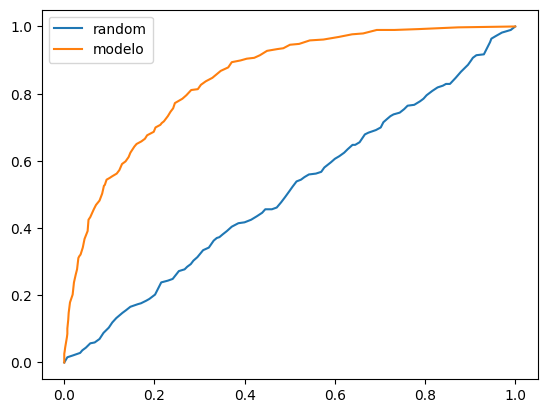

In [30]:
plt.plot(model_ran.fpr,model_ran.tpr, label='random')
plt.plot(df_scor.fpr,df_scor.tpr, label='modelo')
#plt.plot(model_ran.var,model_ran.fpr, label='FPR')
plt.legend()

In [37]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [32]:
auc(df_scor.fpr,df_scor.tpr)

0.8459194991870908

In [35]:
fpr, tpr, par=roc_curve(y_val, y_pred)

In [38]:
roc_auc_score(y_val, y_pred)

0.8463120254863528

In [57]:
def train(df,y_train,C=1.0):
    dicts = df[categorias+numerical].to_dict(orient='records')
    dv=DictVectorizer(sparse=False)
    X_train= dv.fit_transform(dicts)
    
    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)

    return dv, model

In [59]:
dv,model=train(df_train,y_train, C=0.001)

In [42]:
def predict(df, dv, model):
    dicts = df[categorias+numerical].to_dict(orient='records')
    X=dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

In [43]:
y_pred = predict(df_val, dv, model)

In [44]:
from sklearn.model_selection import KFold

In [45]:
kfold= KFold(n_splits=10, shuffle=True, random_state=1)

In [63]:
for C in [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    scores=[]
    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]
        
        y_train = df_train.churn.values
        y_val = df_val.churn.values
        
        dv,model = train(df_train,y_train,C)
        y_pred = predict(df_val, dv, model)
        auc = roc_auc_score(y_val,y_pred)
        scores.append(auc)
    print('%s %.3f +- %.3f' % (C,np.mean(scores),np.std(scores)))

1e-06 0.776 +- 0.025
1e-05 0.804 +- 0.013
0.0001 0.811 +- 0.012
0.001 0.826 +- 0.012
0.01 0.841 +- 0.012
0.1 0.842 +- 0.012
1 0.842 +- 0.012
5 0.842 +- 0.012
10 0.842 +- 0.012


In [69]:
dv,model = train(df_train_full,df_train_full.churn,C=1.0)
y_pred = predict(df_test, dv, model)
auc = roc_auc_score(y_test,y_pred)
auc

0.8584032088573997